In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('height.csv')

In [4]:
df.head()

,Weight,Height
0,60,160.5
1,62,162.3
2,64,164.7
3,65,165.4
4,66,166.2


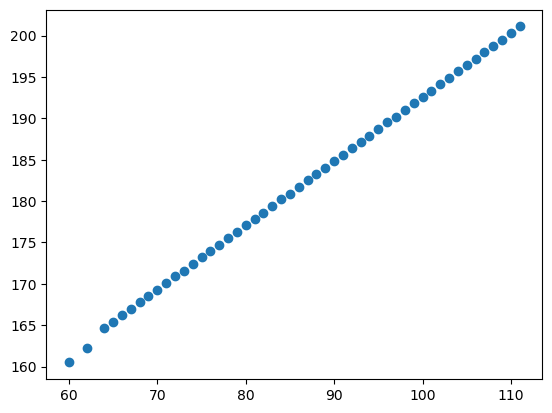

In [6]:
plt.scatter(df[['Weight']],df[['Height']])

In [16]:
X=df[['Weight']]
y=df['Height']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

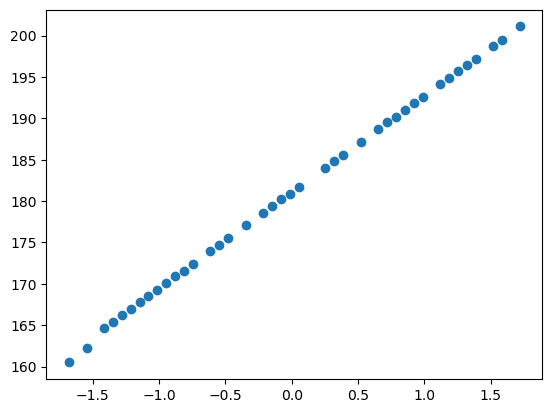

In [22]:
plt.scatter(X_train,y_train)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor=LinearRegression()

In [25]:
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
regressor.coef_

array([11.70403936])

In [27]:
regressor.intercept_

181.045

In [28]:
print("The slope of the weight is", regressor.coef_)
print("The intercept is",regressor.intercept_)

The slope of the weight is [11.70403936]
The intercept is 181.045


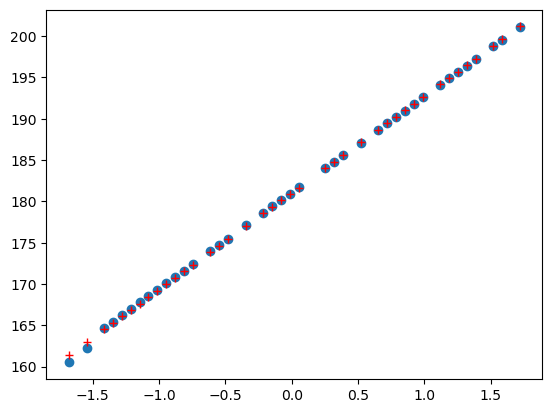

In [31]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r+')

In [32]:
y_test_predict=regressor.predict(X_test)

In [33]:
y_test,y_test_predict

(13    173.2
 39    193.3
 30    186.4
 45    198.0
 17    176.3
 48    200.3
 26    183.3
 25    182.5
 32    187.9
 19    177.8
 Name: Height, dtype: float64,
 array([173.08819799, 193.37024233, 186.34953467, 198.0507141 ,
        176.2085125 , 200.39094998, 183.22922016, 182.44914153,
        187.90969193, 177.76866976]))

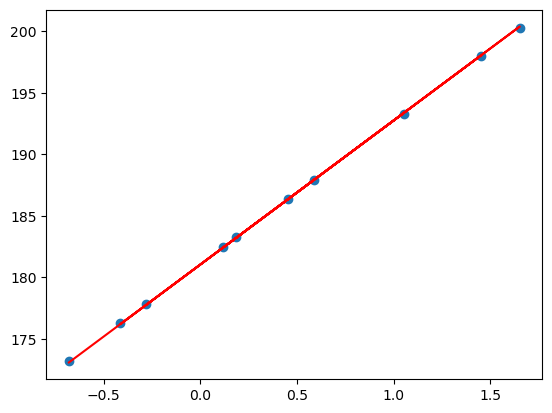

In [35]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
mae=mean_absolute_error(y_test,y_test_predict)
mse=mean_squared_error(y_test,y_test_predict)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

0.06283217093865404
0.004786608983700926
0.06918532347037865


In [40]:
r2_score=r2_score(y_test,y_test_predict)

In [41]:
r2_score

0.9999361921592234

In [42]:
scaled_weight=scaler.transform([[80]])


In [43]:
regressor.predict(scaled_weight)

array([176.98859113])

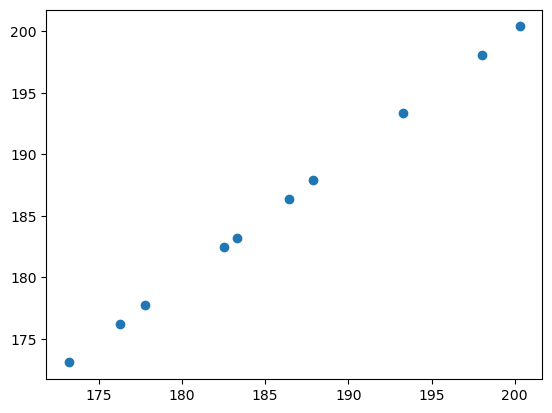

In [44]:
plt.scatter(y_test,y_test_predict)

In [45]:
residuals=y_test-y_test_predict

In [46]:
import seaborn as sns

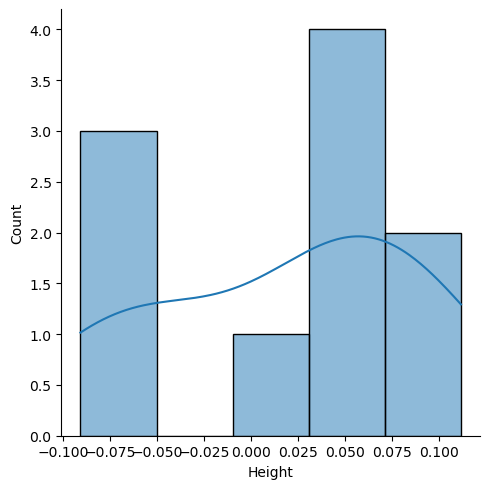

In [47]:
sns.displot(residuals,kde=True)